# Metody Analizy Danych - Projekt 1
_Paweł Kaczorowski_

### Spis treści
1. [Opis obiektów](#1.-Opis-obiekt%C3%B3w)
1. [Cel projektu](#2.-Cel-projektu)
1. [Opis danych](#3.-Opis-danych)
1. [Analiza danych](#4.-Analiza-danych)
  1. [Wskaźniki statystyczne](#Wska%C5%BAniki-statystyczne)
  2. [Standaryzacja](#Standaryzacja)
  1. [Unitaryzacja](#Unitaryzacja)
  1. [Stymulacja](#Stymulacja)
  1. [Analiza skupień](#Analiza-skupie%C5%84)
  1. [Wskaźnik syntetyczny](#Wska%C5%BAnik-syntetyczny)
1. [Wizualizacja](#Wizualizacja-zbioru-danych)
1. [Obserwacje i wnioski](#Obserwacje-i-wnioski)


- [inne wykresy](#Inne-wykresy)

## 1. Opis obiektów
Badam polskie województwa przy użyciu cech dla lat: 2010, 2015, 2016.

## 2. Cel projektu
Celem projektu jest przyjrzenie się produkcji rolnej w poszczególnych województwach oraz uporządkowanie i pogrupowanie ich według niżej opisanych cech.

## 3. Opis danych
Dane do analizy zaczerpnąłem z Roczników Statystycznych Rolnictwa GUS 2017, 2016 i 2011. Przedmiotem analizy są wskaźniki dotyczące produkcji rolnej:
* powierzchnia zasiewów [tys. ha] (tab. 93)
* powierzchnia zasiewów zbóż [tys. ha] (tab. 95)
* zbiory zbóż [tys. t] (tab. 101)
* zbiory ziemniaków [tys. t] (tab. 103)
* zbiory buraków cukrowych [tys. t] (tab. 104)
* bydło [tyś szt.] (tab. 130)
* produkcja żywca rzeźnego [tys. t] (tab. 136)
* produkcja mleka krowiego [mil. l] (tab. 141)
* drób kurzy [tys. szt] (stan w czerwcu) (tab. 134)
* produkcja jaj kurzych [mil. szt.] (tab. 145)
Dane te charakteryzują warunki funkcjonowania i produkcję różnych gałęzi rolnictwa. 

## 4. Analiza danych

In [31]:
# import bibliotek do przetwarzania i wizualizacji danych

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [32]:
# import arkusza z danymi

raw = pd.read_csv('dane/raw.csv', decimal=',')
pd.set_option('max_rows', 19)
pd.set_option('max_columns', 33)
# pd.set_option('precision', 2)
pd.options.display.float_format = '{0:.2f}'.format

# raw

In [33]:
# używam nazwy wojewódxtwa jako indeksu wierszy
# nazwy cechy i roku jako indeksu kolumn

data = raw.set_index('cecha')
data.index.name = 'Województwo'
data = data.T.set_index(['nazwa','rok']).T.drop('POLSKA')
def konwersja(x):
    return  float(x.replace(',','.'))
data = data.applymap(konwersja)
data

nazwa               Powierzchnia zasiewów [tys. ha]                  \
rok                                            2010    2015    2016   
Województwo                                                           
Dolnośląskie                                 715.80  760.30  744.00   
Kujawsko-pomorskie                           898.50  946.00  916.90   
Lubelskie                                   1009.30 1103.70 1074.40   
Lubuskie                                     281.60  277.50  287.80   
Łódzkie                                      735.70  765.30  746.40   
Małopolskie                                  290.90  313.00  299.70   
Mazowieckie                                 1205.60 1259.80 1207.40   
Opolskie                                     453.20  449.70  463.50   
Podkarpackie                                 296.30  320.20  308.40   
Podlaskie                                    605.80  655.60  688.30   
Pomorskie                                    567.90  598.60  572.50   
Śląskie                                      268.00  264.00  261.10   
Świętokrzyskie                               323.00  327.10  321.10   
Warmińsko-mazurskie                          592.10  608.70  668.80   
Wielkopolskie                               1461.30 1463.50 1426.60   
Zachodniopomorskie                           660.90  640.10  653.00   

nazwa               zbiory ziemniaków [tys. t]                 \
rok                                       2010   2015    2016   
Województwo                                                     
Dolnośląskie                            480.90 433.10  767.00   
Kujawsko-pomorskie                      430.90 427.40  603.00   
Lubelskie                               746.10 456.00  607.80   
Lubuskie                                109.70  95.80  147.40   
Łódzkie                                 903.30 674.00 1040.10   
Małopolskie                             524.30 524.00  524.40   
Mazowieckie                            1189.10 641.30 1011.70   
Opolskie                                222.60 162.10  328.80   
Podkarpackie                            646.00 463.80  563.00   
Podlaskie                               353.90 186.90  184.90   
Pomorskie                               513.50 460.60  579.30   
Śląskie                                 207.50 123.50  229.80   
Świętokrzyskie                          330.80 330.40  350.60   
Warmińsko-mazurskie                     248.50 179.70  216.60   
Wielkopolskie                           928.90 636.10  968.00   
Zachodniopomorskie                      351.70 357.20  501.70   

nazwa               zbiory buraków cukrowych [tys. t]                  \
rok                                              2010    2015    2016   
Województwo                                                             
Dolnośląskie                                  1028.30  657.80 1086.50   
Kujawsko-pomorskie                            1837.90 1750.70 2702.90   
Lubelskie                                     1614.20 1674.60 2247.90   
Lubuskie                                        50.60   74.00  101.20   
Łódzkie                                        280.60  260.70  330.10   
Małopolskie                                     44.40   57.80   86.50   
Mazowieckie                                    528.10  620.80  867.20   
Opolskie                                       722.10  527.10 1031.20   
Podkarpackie                                   174.30  194.80  288.40   
Podlaskie                                       13.00    4.20    4.80   
Pomorskie                                      508.10  522.70  689.20   
Śląskie                                         76.30   68.20  127.00   
Świętokrzyskie                                 263.70  186.20  264.90   
Warmińsko-mazurskie                            175.20  117.00  166.20   
Wielkopolskie                                 2100.20 2101.60 2750.20   
Zachodniopomorskie                             555.60  546.30  779.50   

nazwa               bydło 

### Wskaźniki statystyczne

In [34]:
# wskaźniki statystyczne danych

opis = data.apply(lambda srs: srs.describe())
opis.loc['dolny wąs']  = [0] * opis.shape[1]
opis.loc['górny wąs']  = [0] * opis.shape[1]

def dolny_wąs(srs):
    iqr = srs['75%'] - srs['25%']
    srs['dolny wąs'] = srs['25%'] - 1.5 * iqr
opis.apply(dolny_wąs)

def górny_wąs(srs):
    iqr = srs['75%'] - srs['25%']
    srs['górny wąs'] = srs['75%'] + 1.5 * iqr
opis.apply(górny_wąs)

for i in range(int(opis.shape[1]/3)):
    mini = min([opis.loc['min'][i*3],opis.loc['min'][i*3+1],opis.loc['min'][i*3+2]])
    opis.loc['min'][i*3] = opis.loc['min'][i*3+1] = opis.loc['min'][i*3+2] = mini
    
for i in range(int(opis.shape[1]/3)):
    maxi = max([opis.loc['max'][i*3],opis.loc['max'][i*3+1],opis.loc['max'][i*3+2]])
    opis.loc['max'][i*3] = opis.loc['max'][i*3+1] = opis.loc['max'][i*3+2] = maxi
    

opis

nazwa     Powierzchnia zasiewów [tys. ha]                  \
rok                                  2010    2015    2016   
count                               16.00   16.00   16.00   
mean                               647.87  672.07  664.99   
std                                352.41  365.49  351.41   
min                                261.10  261.10  261.10   
25%                                316.32  325.38  317.93   
50%                                598.95  624.40  660.90   
75%                                776.40  810.47  789.02   
max                               1463.50 1463.50 1463.50   
dolny wąs                         -373.79 -402.27 -388.72   
górny wąs                         1466.51 1538.12 1495.67   

nazwa     zbiory ziemniaków [tys. t]                  \
rok                             2010    2015    2016   
count                          16.00   16.00   16.00   
mean                          511.73  384.49  539.01   
std                           300.79  189.65  292.25   
min                            95.80   95.80   95.80   
25%                           310.23  185.10  304.05   
50%                           455.90  430.25  543.70   
75%                           671.02  478.85  647.60   
max                          1189.10 1189.10 1189.10   
dolny wąs                    -230.97 -255.52 -211.27   
górny wąs                    1212.22  919.48 1162.92   

nazwa     zbiory buraków cukrowych [tys. t]                  bydło [tyś szt.]  \
rok                                    2010    2015     2016             2010   
count                                 16.00   16.00    16.00            16.00   
mean                                 623.29  585.28   845.23           358.88   
std                                  674.44  665.35   927.15           314.78   
min                                    4.20    4.20     4.20            69.80   
25%                                  149.80  106.25   156.40           120.40   
50%                                  394.35  391.70   509.65           195.95   
75%                                  798.65  630.05  1045.03           456.65   
max                                 2750.20 2750.20  2750.20          1135.20   
dolny wąs                           -823.48 -679.45 -1176.54          -383.98   
górny wąs                           1771.93 1415.75  2377.96           961.02   

nazwa                     produkcja mleka krowiego [mil. l]                  \
rok          2015    2016                              2010    2015    2016   
count       16.00   16.00                             16.00   16.00   16.00   
mean       372.54  371.20                            745.07  803.71  804.20   
std        348.70  344.92                            750.16  854.62  845.25   
min         69.80   69.80                             83.50   83.50   83.50   
25%        114.35  117.00                            261.05  238.20  241.62   
50%        188.90  193.40                            359.55  337.50  357.40   
75%        469.22  467.52                            932.62  965.08  996.70   
max       1135.20 1135.20                           2794.30 2794.30 2794.30   
dolny wąs -417.96 -408.79                           -746.31 -852.11 -890.99   
górny wąs 1001.54  993.31                           1939.99 2055.39 2129.31   

nazwa     produkcja jaj kurzych [mil. szt.]                  \
rok                                    2010    2015    2016   
count                                 16.00   16.00   16.00   
mean                                 695.25  654.62  662.48   
std                                  920.38  903.78  926.31   
min                                  126.20  126.20  126.20   
25%                                  258.65  249.90  267.28   
50%                                  421.55  314.20  323.15   
75%                                  623.20  566.70  516.90   
max                                 3892.80 3892.80 3892.80   
dolny wąs                           -288.1

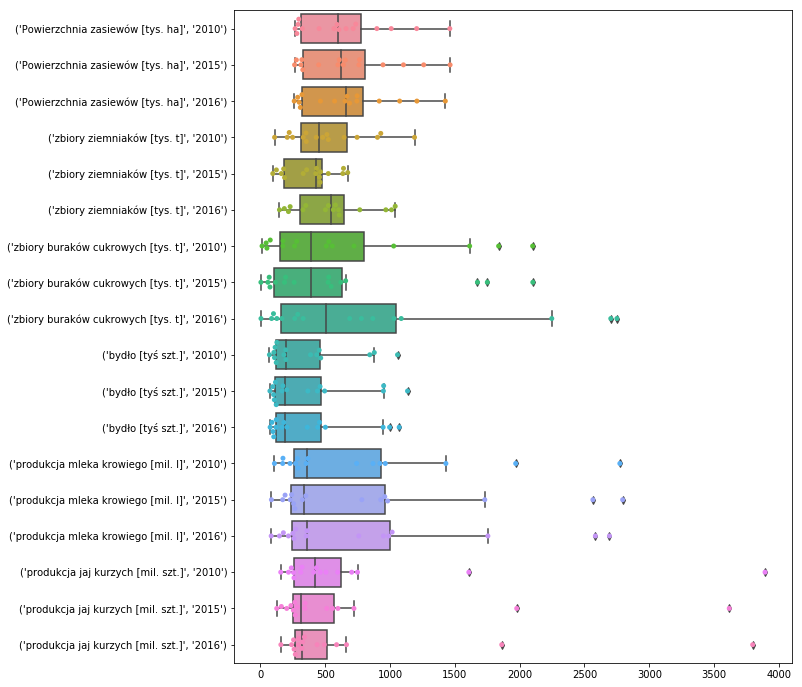

In [35]:
plt.figure(figsize=(10,12))
plot_data = data.iloc[:, :18]

sns.swarmplot(data=plot_data, orient="h")
sns.boxplot(data=plot_data, orient="h")

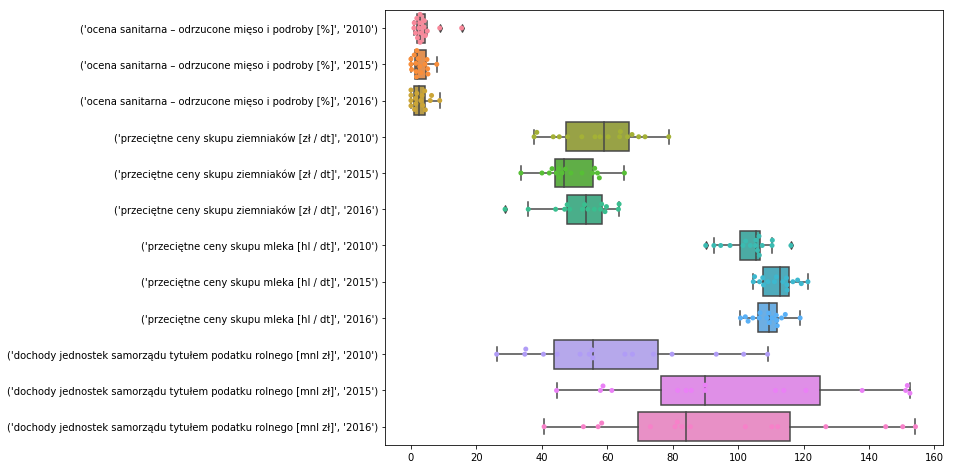

In [36]:
plt.figure(figsize=(10,8))
plot_data = data.iloc[:, 18:]

sns.swarmplot(data=plot_data, orient="h")
sns.boxplot(data=plot_data, orient="h")

Na powyższych wykresach pudełkowych widać wiele wartości odstajęcych (wystających poza wartość dolnego/górnego wąsa), zwłaszcza wśród wyników produkcji rolnej. 

Aby się ich pozbyć zamienię je na wartości odpowiedniego wąsa.

In [37]:
def wąsy(dw, x, gw):
    if x < dw:
        return dw
    if x < gw:
        return x
    return gw

for i in range(data.shape[1]):
    data.iloc[:,i] = data.iloc[:,i].map(lambda x: wąsy(opis.iloc[:,i]['dolny wąs'], x, opis.iloc[:,i]['górny wąs']))
    
data

nazwa               Powierzchnia zasiewów [tys. ha]                  \
rok                                            2010    2015    2016   
Województwo                                                           
Dolnośląskie                                 715.80  760.30  744.00   
Kujawsko-pomorskie                           898.50  946.00  916.90   
Lubelskie                                   1009.30 1103.70 1074.40   
Lubuskie                                     281.60  277.50  287.80   
Łódzkie                                      735.70  765.30  746.40   
Małopolskie                                  290.90  313.00  299.70   
Mazowieckie                                 1205.60 1259.80 1207.40   
Opolskie                                     453.20  449.70  463.50   
Podkarpackie                                 296.30  320.20  308.40   
Podlaskie                                    605.80  655.60  688.30   
Pomorskie                                    567.90  598.60  572.50   
Śląskie                                      268.00  264.00  261.10   
Świętokrzyskie                               323.00  327.10  321.10   
Warmińsko-mazurskie                          592.10  608.70  668.80   
Wielkopolskie                               1461.30 1463.50 1426.60   
Zachodniopomorskie                           660.90  640.10  653.00   

nazwa               zbiory ziemniaków [tys. t]                 \
rok                                       2010   2015    2016   
Województwo                                                     
Dolnośląskie                            480.90 433.10  767.00   
Kujawsko-pomorskie                      430.90 427.40  603.00   
Lubelskie                               746.10 456.00  607.80   
Lubuskie                                109.70  95.80  147.40   
Łódzkie                                 903.30 674.00 1040.10   
Małopolskie                             524.30 524.00  524.40   
Mazowieckie                            1189.10 641.30 1011.70   
Opolskie                                222.60 162.10  328.80   
Podkarpackie                            646.00 463.80  563.00   
Podlaskie                               353.90 186.90  184.90   
Pomorskie                               513.50 460.60  579.30   
Śląskie                                 207.50 123.50  229.80   
Świętokrzyskie                          330.80 330.40  350.60   
Warmińsko-mazurskie                     248.50 179.70  216.60   
Wielkopolskie                           928.90 636.10  968.00   
Zachodniopomorskie                      351.70 357.20  501.70   

nazwa               zbiory buraków cukrowych [tys. t]                  \
rok                                              2010    2015    2016   
Województwo                                                             
Dolnośląskie                                  1028.30  657.80 1086.50   
Kujawsko-pomorskie                            1771.93 1415.75 2377.96   
Lubelskie                                     1614.20 1415.75 2247.90   
Lubuskie                                        50.60   74.00  101.20   
Łódzkie                                        280.60  260.70  330.10   
Małopolskie                                     44.40   57.80   86.50   
Mazowieckie                                    528.10  620.80  867.20   
Opolskie                                       722.10  527.10 1031.20   
Podkarpackie                                   174.30  194.80  288.40   
Podlaskie                                       13.00    4.20    4.80   
Pomorskie                                      508.10  522.70  689.20   
Śląskie                                         76.30   68.20  127.00   
Świętokrzyskie                                 263.70  186.20  264.90   
Warmińsko-mazurskie                            175.20  117.00  166.20   
Wielkopolskie                                 1771.93 1415.75 2377.96   
Zachodniopomorskie                             555.60  546.30  779.50   

nazwa               bydło 

### Standaryzacja

In [38]:
def standaryzacja(srs):
    średnia = srs.describe()['mean']
    odchylenie = srs.describe()['std']
    return srs.map(lambda p: (p - średnia)/odchylenie)
 
std = data.apply(standaryzacja)
std

nazwa               Powierzchnia zasiewów [tys. ha]              \
rok                                            2010  2015  2016   
Województwo                                                       
Dolnośląskie                                   0.19  0.24  0.22   
Kujawsko-pomorskie                             0.71  0.75  0.72   
Lubelskie                                      1.03  1.18  1.17   
Lubuskie                                      -1.04 -1.08 -1.07   
Łódzkie                                        0.25  0.26  0.23   
Małopolskie                                   -1.01 -0.98 -1.04   
Mazowieckie                                    1.58  1.61  1.54   
Opolskie                                      -0.55 -0.61 -0.57   
Podkarpackie                                  -1.00 -0.96 -1.01   
Podlaskie                                     -0.12 -0.05  0.07   
Pomorskie                                     -0.23 -0.20 -0.26   
Śląskie                                       -1.08 -1.12 -1.15   
Świętokrzyskie                                -0.92 -0.94 -0.98   
Warmińsko-mazurskie                           -0.16 -0.17  0.01   
Wielkopolskie                                  2.31  2.17  2.17   
Zachodniopomorskie                             0.04 -0.09 -0.03   

nazwa               zbiory ziemniaków [tys. t]              \
rok                                       2010  2015  2016   
Województwo                                                  
Dolnośląskie                             -0.10  0.26  0.78   
Kujawsko-pomorskie                       -0.27  0.23  0.22   
Lubelskie                                 0.78  0.38  0.24   
Lubuskie                                 -1.34 -1.52 -1.34   
Łódzkie                                   1.30  1.53  1.71   
Małopolskie                               0.04  0.74 -0.05   
Mazowieckie                               2.25  1.35  1.62   
Opolskie                                 -0.96 -1.17 -0.72   
Podkarpackie                              0.45  0.42  0.08   
Podlaskie                                -0.52 -1.04 -1.21   
Pomorskie                                 0.01  0.40  0.14   
Śląskie                                  -1.01 -1.38 -1.06   
Świętokrzyskie                           -0.60 -0.29 -0.64   
Warmińsko-mazurskie                      -0.88 -1.08 -1.10   
Wielkopolskie                             1.39  1.33  1.47   
Zachodniopomorskie                       -0.53 -0.14 -0.13   

nazwa               zbiory buraków cukrowych [tys. t]              \
rok                                              2010  2015  2016   
Województwo                                                         
Dolnośląskie                                     0.69  0.30  0.34   
Kujawsko-pomorskie                               1.89  1.82  1.89   
Lubelskie                                        1.63  1.82  1.73   
Lubuskie                                        -0.88 -0.86 -0.84   
Łódzkie                                         -0.51 -0.49 -0.56   
Małopolskie                                     -0.89 -0.89 -0.86   
Mazowieckie                                     -0.11  0.23  0.08   
Opolskie                                         0.20  0.04  0.27   
Podkarpackie                                    -0.68 -0.62 -0.61   
Podlaskie                                       -0.94 -1.00 -0.95   
Pomorskie                                       -0.15  0.03 -0.13   
Śląskie                                         -0.84 -0.87 -0.81   
Świętokrzyskie                                  -0.54 -0.64 -0.64   
Warmińsko-mazurskie                             -0.68 -0.78 -0.76   
Wielkopolskie                                    1.89  1.82  1.89   
Zachodniopomorskie                              -0.07  0.08 -0.03   

nazwa               bydło [tyś szt.]              \
rok                             2010  2015  2016   
Województwo                                        
Dolnośląskie                   -0.81 -0.78 -0.79   
Kujawsko-pomorskie         

In [39]:
# colormap = plt.cm.YlGn
colormap2 = plt.cm.bwr_r
# colormap2 = plt.cm.seismic
# colormap1 = plt.cm.Blues
# colormap2 = plt.cm.RdBu

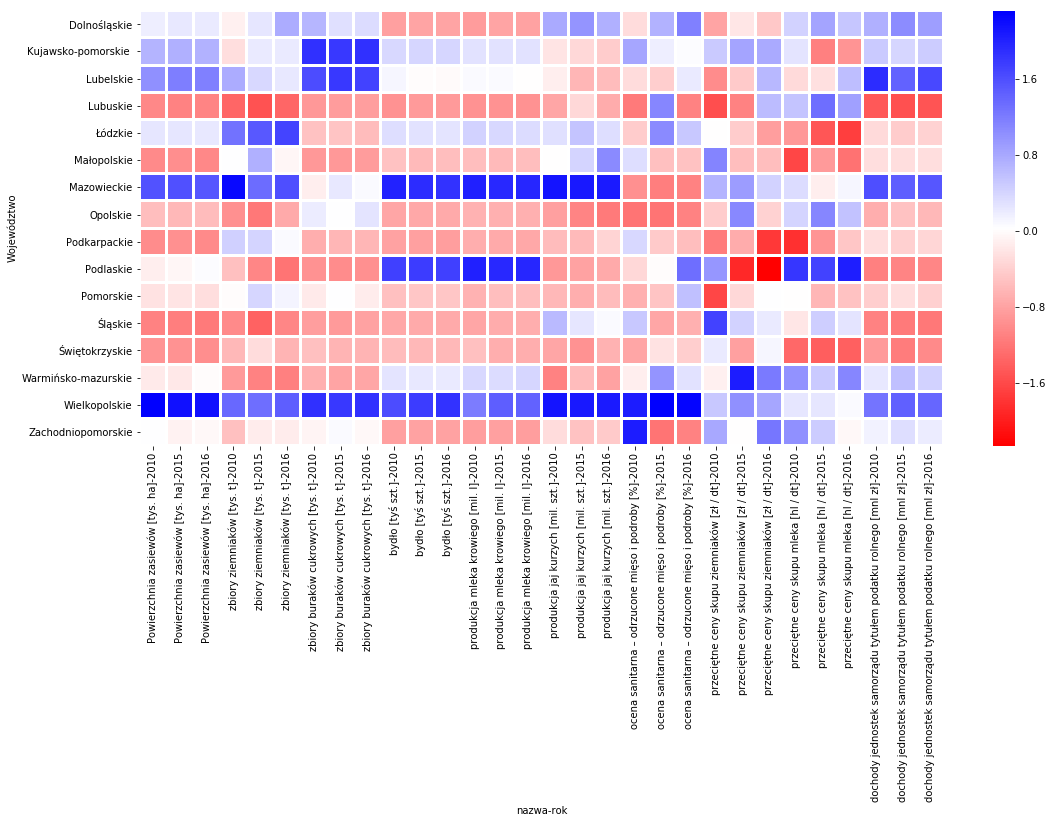

In [40]:
plt.figure(figsize=(18,8))
sns.heatmap(std,  cmap=colormap2, linewidths=2)

In [41]:
# wskaźniki statystyczne danych standaryzowanych

opis_std = std.apply(lambda srs: srs.describe())
opis_std.loc['dolny wąs']  = [0] * opis.shape[1]
opis_std.loc['górny wąs']  = [0] * opis.shape[1]

# dolny_wąs i górny_wąs zdefiniowane wcześniej
opis_std.apply(dolny_wąs)
opis_std.apply(górny_wąs)

opis_std

nazwa     Powierzchnia zasiewów [tys. ha]              \
rok                                  2010  2015  2016   
count                               16.00 16.00 16.00   
mean                                 0.00 -0.00  0.00   
std                                  1.00  1.00  1.00   
min                                 -1.08 -1.12 -1.15   
25%                                 -0.94 -0.95 -0.99   
50%                                 -0.14 -0.13 -0.01   
75%                                  0.36  0.38  0.35   
max                                  2.31  2.17  2.17   
dolny wąs                           -2.90 -2.94 -3.00   
górny wąs                            2.32  2.37  2.36   

nazwa     zbiory ziemniaków [tys. t]              \
rok                             2010  2015  2016   
count                          16.00 16.00 16.00   
mean                           -0.00 -0.00  0.00   
std                             1.00  1.00  1.00   
min                            -1.34 -1.52 -1.34   
25%                            -0.67 -1.05 -0.80   
50%                            -0.19  0.24  0.02   
75%                             0.53  0.50  0.37   
max                             2.25  1.53  1.71   
dolny wąs                      -2.47 -3.37 -2.57   
górny wąs                       2.33  2.82  2.13   

nazwa     zbiory buraków cukrowych [tys. t]             bydło [tyś szt.]  \
rok                                    2010  2015  2016             2010   
count                                 16.00 16.00 16.00            16.00   
mean                                   0.00 -0.00 -0.00             0.00   
std                                    1.00  1.00  1.00             1.00   
min                                   -0.94 -1.00 -0.95            -0.94   
25%                                   -0.72 -0.80 -0.77            -0.77   
50%                                   -0.33 -0.23 -0.35            -0.52   
75%                                    0.32  0.25  0.29             0.34   
max                                    1.89  1.82  1.89             2.02   
dolny wąs                             -2.29 -2.37 -2.37            -2.45   
górny wąs                              1.89  1.82  1.89             2.02   

nazwa                 produkcja mleka krowiego [mil. l]              \
rok        2015  2016                              2010  2015  2016   
count     16.00 16.00                             16.00 16.00 16.00   
mean      -0.00  0.00                             -0.00 -0.00 -0.00   
std        1.00  1.00                              1.00  1.00  1.00   
min       -0.88 -0.87                             -0.95 -0.94 -0.93   
25%       -0.76 -0.74                             -0.70 -0.72 -0.71   
50%       -0.53 -0.52                             -0.54 -0.57 -0.54   
75%        0.32  0.30                              0.39  0.35  0.36   
max        1.93  1.88                              2.04  1.96  1.97   
dolny wąs -2.37 -2.32                             -2.34 -2.32 -2.32   
górny wąs  1.93  1.88                              2.04  1.96  1.97   

nazwa     produkcja jaj kurzych [mil. szt.]              \
rok                                    2010  2015  2016   
count                                 16.00 16.00 16.00   
mean                                   0.00  0.00  0.00   
std                                    1.00  1.00  1.00   
min                                   -1.09 -1.07 -1.16   
25%                                   -0.76 -0.64 -0.67   
50%                                   -0.24 -0.42 -0.43   
75%                                    0.40  0.45  0.43   
max                                    2.14  2.10  2.08   
dolny wąs                             -2.51 -2.28 -2.33   
górny wąs                              2.14  2.10  2.08   

nazwa     ocena sanitarna – odrzucone mięso i podroby [%]              \
rok                                                  2010  2015  2016   
count                                               16.00 16.00 16.00

### Unitaryzacja

In [42]:
def unitaryzacja(srs):
    mini = srs.describe()['min']
    rozstep = srs.describe()['max'] - mini
    return srs.map(lambda p: (p - mini)/rozstep)
 
uni = data.apply(unitaryzacja)
uni

nazwa               Powierzchnia zasiewów [tys. ha]            \
rok                                            2010 2015 2016   
Województwo                                                     
Dolnośląskie                                   0.38 0.41 0.41   
Kujawsko-pomorskie                             0.53 0.57 0.56   
Lubelskie                                      0.62 0.70 0.70   
Lubuskie                                       0.01 0.01 0.02   
Łódzkie                                        0.39 0.42 0.42   
Małopolskie                                    0.02 0.04 0.03   
Mazowieckie                                    0.79 0.83 0.81   
Opolskie                                       0.16 0.15 0.17   
Podkarpackie                                   0.02 0.05 0.04   
Podlaskie                                      0.28 0.33 0.37   
Pomorskie                                      0.25 0.28 0.27   
Śląskie                                        0.00 0.00 0.00   
Świętokrzyskie                                 0.05 0.05 0.05   
Warmińsko-mazurskie                            0.27 0.29 0.35   
Wielkopolskie                                  1.00 1.00 1.00   
Zachodniopomorskie                             0.33 0.31 0.34   

nazwa               zbiory ziemniaków [tys. t]            \
rok                                       2010 2015 2016   
Województwo                                                
Dolnośląskie                              0.34 0.58 0.69   
Kujawsko-pomorskie                        0.30 0.57 0.51   
Lubelskie                                 0.59 0.62 0.52   
Lubuskie                                  0.00 0.00 0.00   
Łódzkie                                   0.74 1.00 1.00   
Małopolskie                               0.38 0.74 0.42   
Mazowieckie                               1.00 0.94 0.97   
Opolskie                                  0.10 0.11 0.20   
Podkarpackie                              0.50 0.64 0.47   
Podlaskie                                 0.23 0.16 0.04   
Pomorskie                                 0.37 0.63 0.48   
Śląskie                                   0.09 0.05 0.09   
Świętokrzyskie                            0.20 0.41 0.23   
Warmińsko-mazurskie                       0.13 0.15 0.08   
Wielkopolskie                             0.76 0.93 0.92   
Zachodniopomorskie                        0.22 0.45 0.40   

nazwa               zbiory buraków cukrowych [tys. t]            \
rok                                              2010 2015 2016   
Województwo                                                       
Dolnośląskie                                     0.58 0.46 0.46   
Kujawsko-pomorskie                               1.00 1.00 1.00   
Lubelskie                                        0.91 1.00 0.95   
Lubuskie                                         0.02 0.05 0.04   
Łódzkie                                          0.15 0.18 0.14   
Małopolskie                                      0.02 0.04 0.03   
Mazowieckie                                      0.29 0.44 0.36   
Opolskie                                         0.40 0.37 0.43   
Podkarpackie                                     0.09 0.14 0.12   
Podlaskie                                        0.00 0.00 0.00   
Pomorskie                                        0.28 0.37 0.29   
Śląskie                                          0.04 0.05 0.05   
Świętokrzyskie                                   0.14 0.13 0.11   
Warmińsko-mazurskie                              0.09 0.08 0.07   
Wielkopolskie                                    1.00 1.00 1.00   
Zachodniopomorskie                               0.31 0.38 0.33   

nazwa               bydło [tyś szt.]            \
rok                             2010 2015 2016   
Województwo                                      
Dolnośląskie                    0.04 0.04 0.03   
Kujawsko-pomorskie              0.44 0.45 0.46   
Lubelskie                       0.36 0.32 0.31   
Lubuskie                        0.00 0.00 0.00   

In [43]:
# wskaźniki statystyczne danych unitaryzowanych

opis_uni = uni.apply(lambda srs: srs.describe())
opis_uni.loc['dolny wąs']  = [0] * opis.shape[1]
opis_uni.loc['górny wąs']  = [0] * opis.shape[1]

# dolny_wąs i górny_wąs zdefiniowane wcześniej
opis_uni.apply(dolny_wąs)
opis_uni.apply(górny_wąs)

opis_uni

nazwa     Powierzchnia zasiewów [tys. ha]              \
rok                                  2010  2015  2016   
count                               16.00 16.00 16.00   
mean                                 0.32  0.34  0.35   
std                                  0.30  0.30  0.30   
min                                  0.00  0.00  0.00   
25%                                  0.04  0.05  0.05   
50%                                  0.28  0.30  0.34   
75%                                  0.43  0.46  0.45   
max                                  1.00  1.00  1.00   
dolny wąs                           -0.54 -0.56 -0.56   
górny wąs                            1.00  1.06  1.06   

nazwa     zbiory ziemniaków [tys. t]              \
rok                             2010  2015  2016   
count                          16.00 16.00 16.00   
mean                            0.37  0.50  0.44   
std                             0.28  0.33  0.33   
min                             0.00  0.00  0.00   
25%                             0.19  0.15  0.18   
50%                             0.32  0.58  0.44   
75%                             0.52  0.66  0.56   
max                             1.00  1.00  1.00   
dolny wąs                      -0.32 -0.61 -0.40   
górny wąs                       1.02  1.42  1.14   

nazwa     zbiory buraków cukrowych [tys. t]             bydło [tyś szt.]  \
rok                                    2010  2015  2016             2010   
count                                 16.00 16.00 16.00            16.00   
mean                                   0.33  0.36  0.34             0.32   
std                                    0.35  0.35  0.35             0.34   
min                                    0.00  0.00  0.00             0.00   
25%                                    0.08  0.07  0.06             0.06   
50%                                    0.22  0.27  0.21             0.14   
75%                                    0.45  0.44  0.44             0.43   
max                                    1.00  1.00  1.00             1.00   
dolny wąs                             -0.48 -0.48 -0.50            -0.51   
górny wąs                              1.00  1.00  1.00             1.00   

nazwa                 produkcja mleka krowiego [mil. l]              \
rok        2015  2016                              2010  2015  2016   
count     16.00 16.00                             16.00 16.00 16.00   
mean       0.31  0.32                              0.32  0.33  0.32   
std        0.36  0.36                              0.33  0.34  0.34   
min        0.00  0.00                              0.00  0.00  0.00   
25%        0.04  0.05                              0.08  0.08  0.08   
50%        0.12  0.13                              0.14  0.13  0.13   
75%        0.43  0.43                              0.45  0.45  0.45   
max        1.00  1.00                              1.00  1.00  1.00   
dolny wąs -0.53 -0.53                             -0.47 -0.48 -0.48   
górny wąs  1.00  1.00                              1.00  1.00  1.00   

nazwa     produkcja jaj kurzych [mil. szt.]              \
rok                                    2010  2015  2016   
count                                 16.00 16.00 16.00   
mean                                   0.34  0.34  0.36   
std                                    0.31  0.32  0.31   
min                                    0.00  0.00  0.00   
25%                                    0.10  0.14  0.15   
50%                                    0.26  0.21  0.22   
75%                                    0.46  0.48  0.49   
max                                    1.00  1.00  1.00   
dolny wąs                             -0.44 -0.38 -0.36   
górny wąs                              1.00  1.00  1.00   

nazwa     ocena sanitarna – odrzucone mięso i podroby [%]              \
rok                                                  2010  2015  2016   
count                                               16.00 16.00 16.00

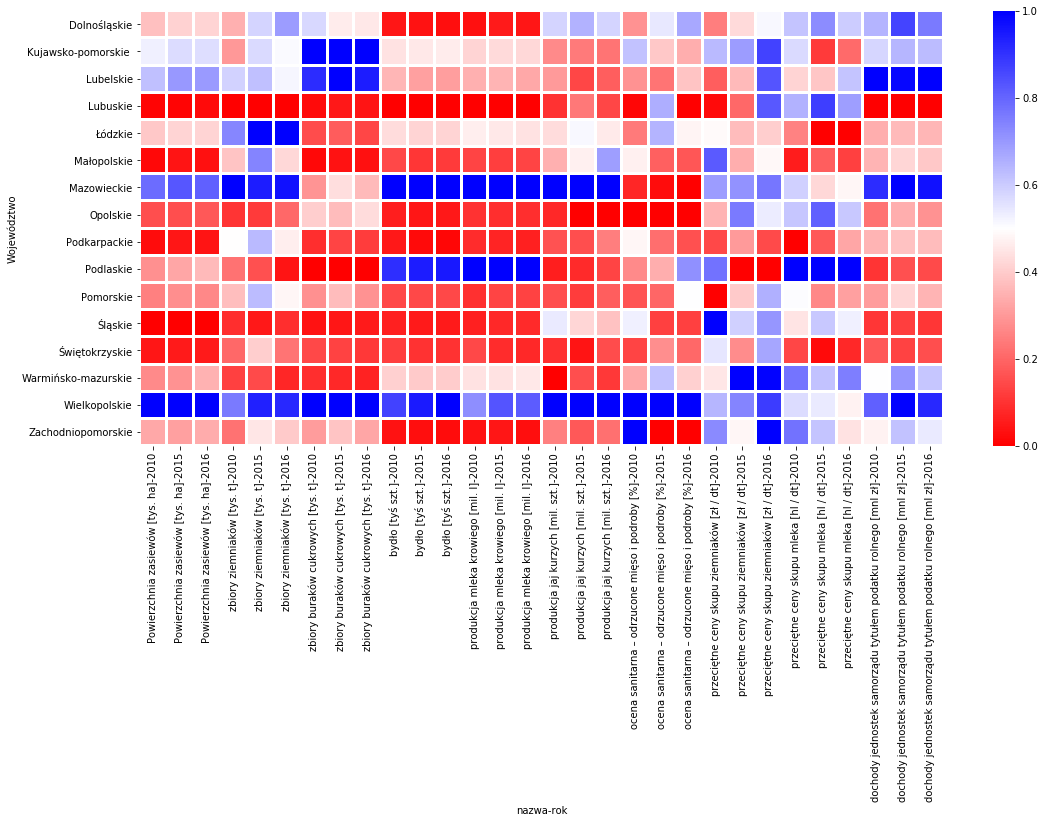

In [44]:
plt.figure(figsize=(18,8))
sns.heatmap(uni, cmap=colormap2, linewidths=2)

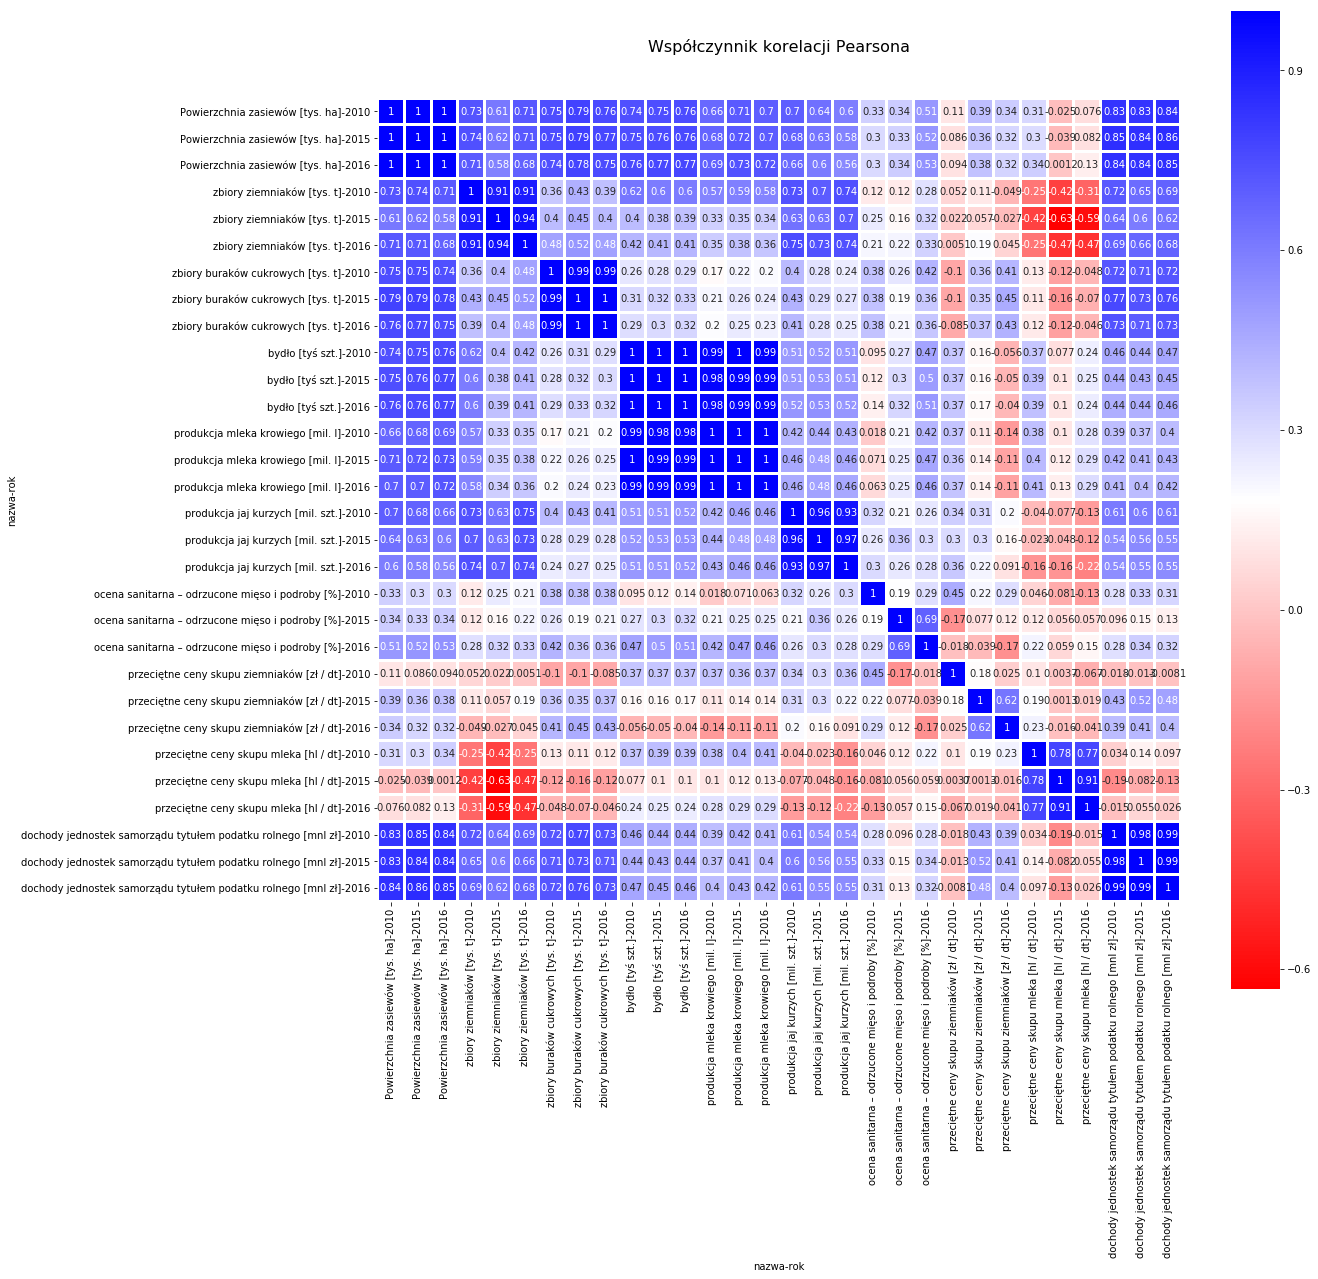

In [45]:
# colormap = plt.cm.RdBu
# colormap = plt.cm.RdYlGn
plt.figure(figsize=(18,18))
plt.title('Współczynnik korelacji Pearsona', y=1.05, size=16)
sns.heatmap(uni.astype(float).corr(),linewidths=2, # vmax=1.0, vmin = -1,
            square=True, cmap=colormap2, annot=True)
# sns.heatmap(uni.astype(float).corr(),linewidths=0.05, square=True, cmap=colormap, xticklabels=3, yticklabels=3)

### Stymulacja

In [46]:
uni.loc[:,["ocena sanitarna – odrzucone mięso i podroby [%]", "przeciętne ceny skupu ziemniaków [zł / dt]", "przeciętne ceny skupu mleka [hl / dt]"]]

nazwa               ocena sanitarna – odrzucone mięso i podroby [%]            \
rok                                                            2010 2015 2016   
Województwo                                                                     
Dolnośląskie                                                   0.29 0.54 0.67   
Kujawsko-pomorskie                                             0.62 0.39 0.34   
Lubelskie                                                      0.29 0.23 0.39   
Lubuskie                                                       0.02 0.66 0.00   
Łódzkie                                                        0.24 0.65 0.48   
Małopolskie                                                    0.47 0.19 0.17   
Mazowieckie                                                    0.08 0.03 0.00   
Opolskie                                                       0.00 0.00 0.00   
Podkarpackie                                                   0.48 0.22 0.16   
Podlaskie                                                      0.27 0.34 0.72   
Pomorskie                                                      0.17 0.20 0.50   
Śląskie                                                        0.53 0.13 0.12   
Świętokrzyskie                                                 0.14 0.28 0.20   
Warmińsko-mazurskie                                            0.33 0.62 0.41   
Wielkopolskie                                                  1.00 1.00 1.00   
Zachodniopomorskie                                             1.00 0.00 0.00   

nazwa               przeciętne ceny skupu ziemniaków [zł / dt]            \
rok                                                       2010 2015 2016   
Województwo                                                                
Dolnośląskie                                              0.25 0.43 0.51   
Kujawsko-pomorskie                                        0.64 0.69 0.87   
Lubelskie                                                 0.19 0.37 0.84   
Lubuskie                                                  0.02 0.20 0.83   
Łódzkie                                                   0.49 0.37 0.40   
Małopolskie                                               0.82 0.34 0.49   
Mazowieckie                                               0.69 0.71 0.77   
Opolskie                                                  0.35 0.76 0.54   
Podkarpackie                                              0.14 0.30 0.15   
Podlaskie                                                 0.78 0.00 0.00   
Pomorskie                                                 0.00 0.40 0.65   
Śląskie                                                   1.00 0.59 0.71   
Świętokrzyskie                                            0.55 0.27 0.68   
Warmińsko-mazurskie                                       0.45 1.00 0.99   
Wielkopolskie                                             0.64 0.74 0.88   
Zachodniopomorskie                                        0.73 0.48 1.00   

nazwa               przeciętne ceny skupu mleka [hl / dt]            
rok                                                  2010 2015 2016  
Województwo                                                          
Dolnośląskie                                         0.62 0.72 0.60  
Kujawsko-pomorskie                                   0.57 0.11 0.21  
Lubelskie                                            0.42 0.39 0.62  
Lubuskie                                             0.65 0.88 0.69  
Łódzkie                                              0.25 0.00 0.00  
Małopolskie                                          0.06 0.19 0.13  
Mazowieckie                                          0.59 0.42 0.48  
Opolskie                                             0.61 0.81 0.61  
Podkarpackie                                         0.00 0.17 0.33  
Podlaskie                                            1.00 1.00 1.00  
Pomorskie                                            0.50 0.27 0.31  
Śląskie                            

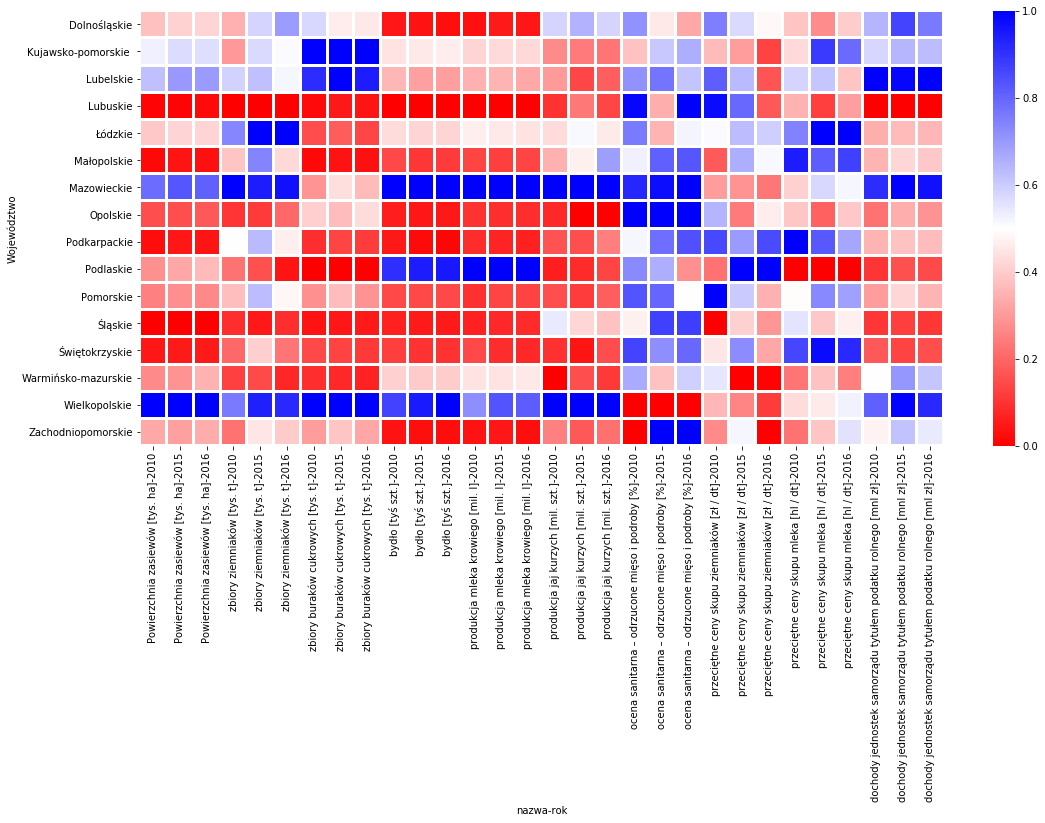

In [47]:
def stymualcja(v):
    return 1 - v

uni.loc[:,["ocena sanitarna – odrzucone mięso i podroby [%]", 
           "przeciętne ceny skupu ziemniaków [zł / dt]", 
           "przeciętne ceny skupu mleka [hl / dt]"]] = uni.loc[:,["ocena sanitarna – odrzucone mięso i podroby [%]", "przeciętne ceny skupu ziemniaków [zł / dt]", "przeciętne ceny skupu mleka [hl / dt]"]].applymap(stymualcja)

plt.figure(figsize=(18,8))
sns.heatmap(uni.iloc[:, :], cmap=colormap2, linewidths=2)

### Analiza skupień

In [48]:
# Algorytm k-średnich
clusters = KMeans(n_clusters = 4)
uni['cluster'] = clusters.fit_predict(uni)

Dla 4 grup otrzymujemy następujący podział:

In [49]:
uni.sort_values(by='cluster').loc[:,'cluster']

Województwo
Dolnośląskie           0
Kujawsko-pomorskie     0
Lubelskie              0
Łódzkie                0
Lubuskie               1
Małopolskie            1
Opolskie               1
Podkarpackie           1
Pomorskie              1
Śląskie                1
Świętokrzyskie         1
Warmińsko-mazurskie    1
Zachodniopomorskie     1
Podlaskie              2
Mazowieckie            3
Wielkopolskie          3
Name: cluster, dtype: int32

### Wskaźnik syntetyczny

In [50]:
sm = std.sum(axis=1)
std['sm'] = sm
ranking = std.reset_index().sort_values('sm').index
list(zip(ranking, std.index))
sm.sort_values()

Województwo
Lubuskie              -22.11
Świętokrzyskie        -21.25
Podkarpackie          -18.44
Opolskie              -14.25
Śląskie               -14.05
Małopolskie           -11.94
Pomorskie             -10.13
Zachodniopomorskie     -3.04
Łódzkie                 1.74
Warmińsko-mazurskie     2.03
Podlaskie               3.27
Dolnośląskie            5.36
Kujawsko-pomorskie     11.90
Lubelskie              12.83
Mazowieckie            32.14
Wielkopolskie          45.95
dtype: float64

## Wizualizacja zbioru danych
### Analiza głównych składowych

In [51]:
# Analiza głównych składowych
pca = PCA(n_components = 2)
uni_pca2 = uni.copy()
uni_pca2['x'] = pca.fit_transform(uni)[:, 0]
uni_pca2['y'] = pca.fit_transform(uni)[:, 1]
# uni_pca2

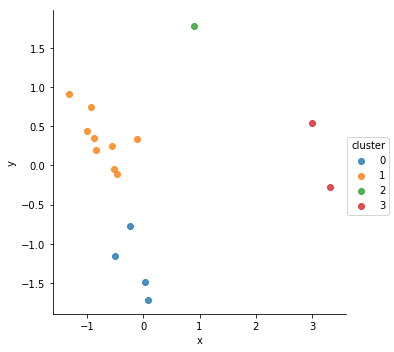

In [52]:
sns.lmplot(data=uni_pca2, x="x", y="y", hue="cluster", size = 5, fit_reg=False)

In [53]:
# PCA dla 5 wymiarów:
pca5_data = uni.copy()
pca5 = PCA(n_components = 5)
tab_pca5 = pd.DataFrame(pca5.fit_transform(pca5_data))
tab_pca5.index = pca5_data.index
tab_pca5['cluster'] = pca5_data['cluster']
# tab_pca5

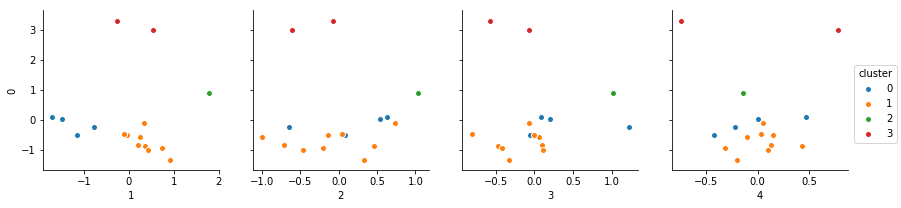

In [54]:
# uni_pca5.iloc[:,5] = uni_pca5.iloc[:,5].apply(str)
sns.pairplot(tab_pca5, x_vars=[1,2,3,4], y_vars=[0], hue="cluster", size = 3)

In [55]:
# # tab_pca5['sm'] = ranking
# tab_pca5['sm'] = sm
# g = sns.pairplot(tab_pca5, x_vars=[1,2,3,4], y_vars=[0], hue="sm", palette=sns.color_palette("coolwarm", 16), size = 3)
# new_labels = tab_pca5.index
# for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
# g._legend.set_title("Województwo")

### Obserwacje i wnioski
- korelacje:
  - powierzchnia zasiewów wykazuje wysoką korelację ze wszytkimi wskaźnikami produkcji rolnej (w tym hodowli)
  - bardzo silnie skorelowana jest liczebność bydła i produkcja mleka
  - wielkość zbiorów ziemniak jest silnie skorelowana ze wskaźnikami dotyczącymi chodowli
  - zastanawiającą ujemną korelację wykazują: wielkość zbiorów ziemniaka i cena skupu mleka
- wyraźnie odznaczają się wojewódźtwa: Mazowieckie i Wielkopolskie, zostały one wyróźnione jako klaster 3, jest to także widoczne na wykresach PCA
- województwa: Lubuskie, Małopolskie, Opolskie, Podkarpackie, Pomorskie, Śląskie, Świętokrzyskie, Warmińsko-mazurskie, Zachodniopomorskie wykazują dużą spójność pomipo różnic geograficznych i historycznych
- ceny skupu ziemniaków i mleka oraz procent odrzuconych produktów są destymulantami, pozostałe cechy są stymulantami

#### Inne wykresy
_ładne, niekowniecznie sensowne_

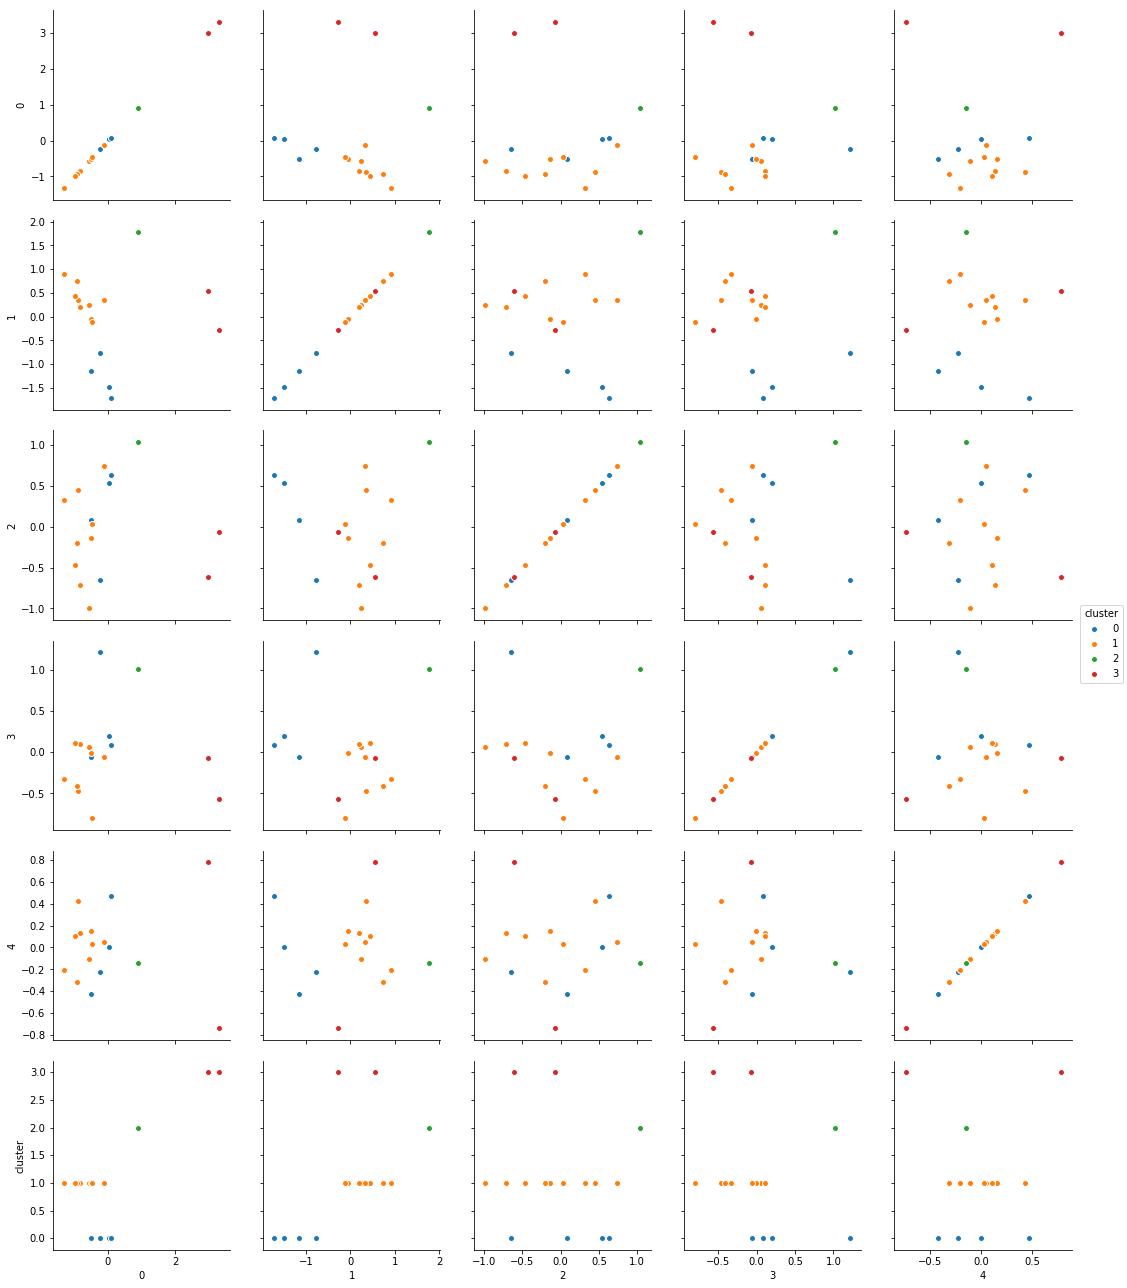

In [56]:
sns.pairplot(tab_pca5, x_vars=[0,1,2,3,4], y_vars=[0,1,2,3,4,"cluster"], hue="cluster", size = 3)

In [57]:
# plt.figure(figsize=(20,20))
# sns.pairplot(uni.xs('2010', axis=1, level=1).iloc[:,:5], kind="reg")

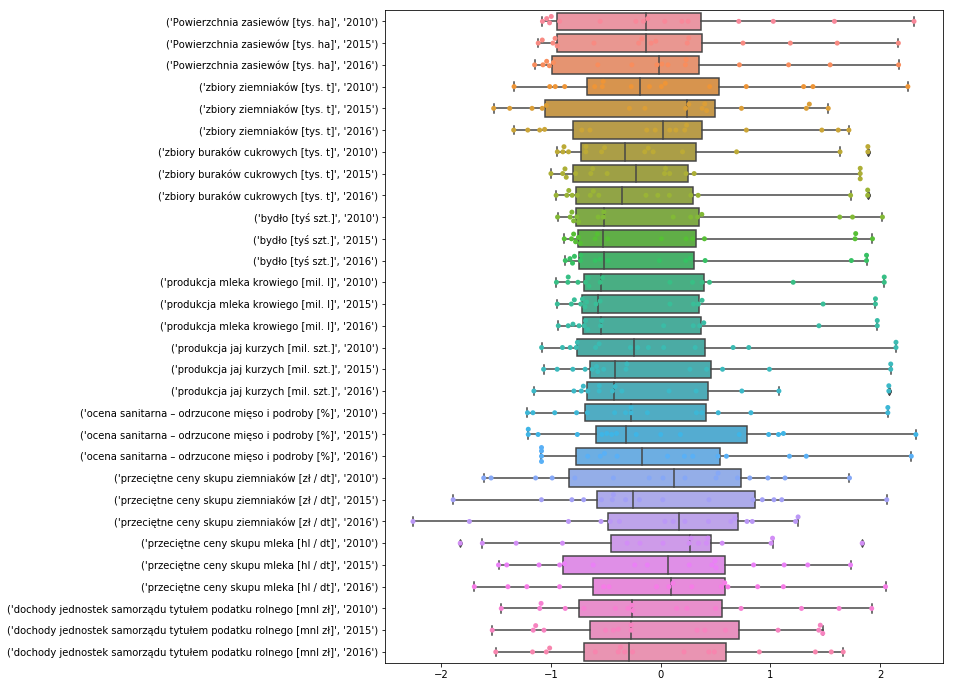

In [58]:
plt.figure(figsize=(10,12))
plot_data = std.iloc[:,:-1]

sns.swarmplot(data=plot_data, orient="h")
sns.boxplot(data=plot_data, orient="h")

### TODO
- [x] indexy
- [x] wąsy
 - [x] elementy odstające
- [x] normalizacja 
 - [x] podstawowe wskaźniki: wartości standaryzowane
- [x] unitaryzacja
 - [x] podstawowe wskaźniki: wartości unitaryzowane
- [x] stymualnty, destymulanty
 - [ ] stymulacja danych normalizowanych
 - [x] stymulacja danych unitaryzowanych
- [x] wskaźnik syntetyczny
- [ ] grupy premiowe
 - [x] wizualizacja zbioru obiektów